In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd 

In [3]:
data = pd.read_csv("../data/ecgvf.dat", header=None) 

(228.0, 342.0)

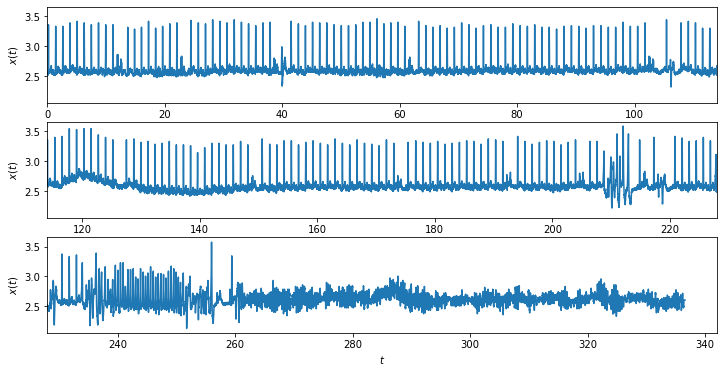

In [4]:
tm=np.linspace(0,data.size/250,data.size)

fig, axs = plt.subplots(3, 1, figsize=(12, 6), )
axs[0].plot(tm,data)
axs[1].plot(tm,data)
axs[2].plot(tm,data)
axs[0].set_xlabel("$t$")
axs[0].set_ylabel("$x(t)$")
axs[1].set_xlabel("$t$")
axs[1].set_ylabel("$x(t)$")
axs[2].set_xlabel("$t$")
axs[2].set_ylabel("$x(t)$")
axs[0].set_xlim(0, 114)
axs[1].set_xlim(114, 228)
axs[2].set_xlim(228, 342)

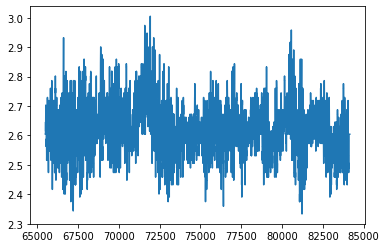

In [5]:
plt.plot(data[262*250:data.size])

In [6]:
z=data.to_numpy()
z=z[262*250:data.size] #the fibrillation bit

In [7]:
z=np.concatenate(z)

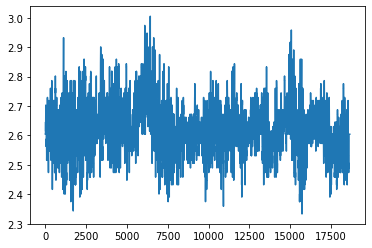

In [8]:
plt.plot(z)

In [9]:
from sklearn.utils import shuffle

def surrogate_alg0(z):
    return shuffle(z)

In [10]:
surrogate_alg0(z)

array([2.45833, 2.66146, 2.90104, ..., 2.53125, 2.5625 , 2.5625 ])

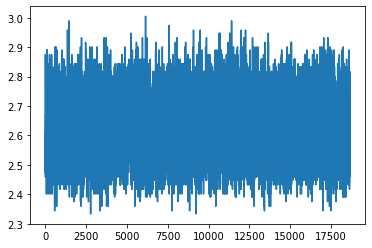

In [11]:
plt.plot(surrogate_alg0(z))

In [12]:
def surrogate_alg1(z):
    fz  = np.fft.rfft(z) 
    phi = np.exp(np.random.uniform(0,np.pi,int(len(z)/2)+1)*1.0j)
    return np.fft.irfft(fz*phi) 

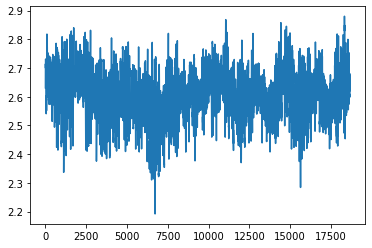

In [13]:
plt.plot(surrogate_alg1(z))

In [14]:
def reorder(x,y): #shuffle x into the same rank ordering as y - both 1-d arrays
    rz=np.zeros(len(y))
    idx=np.argsort(y)
    rz[idx]=np.sort(x)
    return rz

In [15]:
def surrogate_alg2(z):
    g=np.random.normal(0, 1, len(z))
    gs=reorder(g,z)
    gs=surrogate_alg1(gs)
    zs=reorder(z,gs)
    return zs

In [16]:
zs=surrogate_alg2(z)

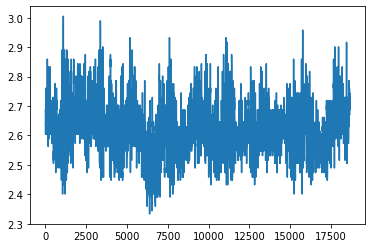

In [17]:
plt.plot(zs)

Text(0.5, 1.0, 'Algorithm 2')

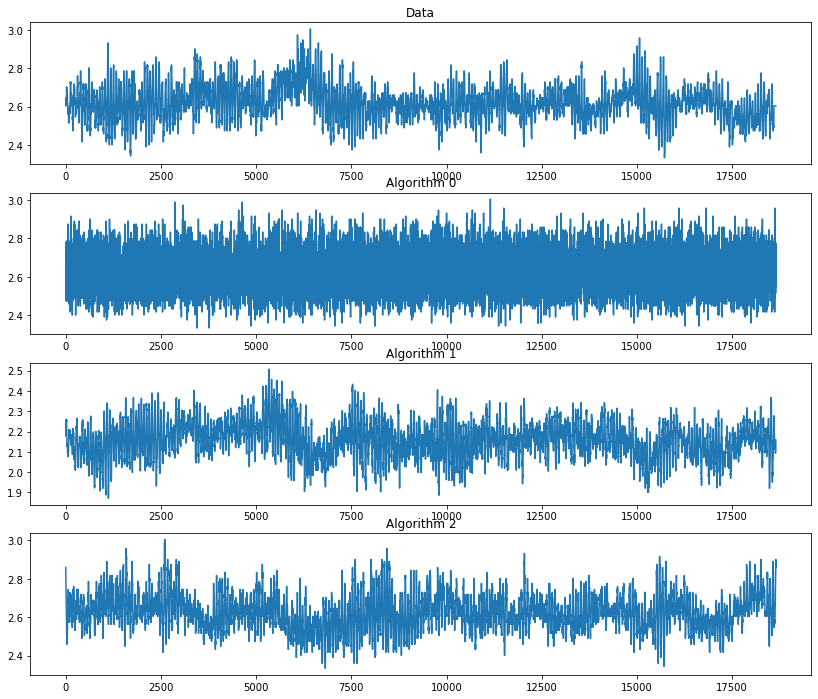

In [18]:
fig, axs = plt.subplots(4,figsize=(14,12))
axs[0].plot(z)
axs[0].set_title("Data")
axs[1].plot(surrogate_alg0(z))
axs[1].set_title("Algorithm 0")
axs[2].plot(surrogate_alg1(z))
axs[2].set_title("Algorithm 1")
axs[3].plot(surrogate_alg2(z))
axs[3].set_title("Algorithm 2")


In [19]:
from scipy.stats import skew

def test_statistic(xdat):
    return skew(xdat)

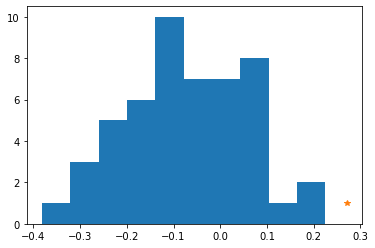

In [20]:
ntrials=50
nullscore=[test_statistic(surrogate_alg1(z)) for _ in range(50)]
truescore=test_statistic(z)

plt.hist(nullscore)
plt.plot(truescore, 1, marker="*")

In [21]:
def ApEn(U, m, r) -> float:
    """Approximate_entropy - code from https://en.wikipedia.org/wiki/Approximate_entropy"""

    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [
            len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0)
            for x_i in x
        ]
        return (N - m + 1.0) ** (-1) * sum(np.log(C))

    N = len(U)

    return abs(_phi(m + 1) - _phi(m))

In [22]:
## https://arthurpessa.github.io/ordpy/_build/html/index.html
## code for various permutation entropy implementations
##
## install with pip install ordpy

In [24]:
import ordpy

In [31]:

def test_statistic(xdat):
    (pe,cp) = ordpy.complexity_entropy(xdat, dx=4)
    return pe

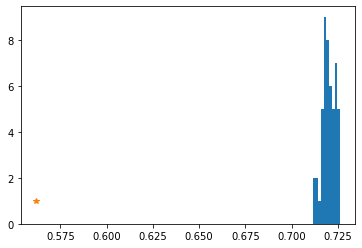

In [34]:
ntrials=50
nullscore=[test_statistic(surrogate_alg2(z)) for _ in range(50)]
truescore=test_statistic(z)

plt.hist(nullscore)
plt.plot(truescore, 1, marker="*")